In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Ekstrak file zip
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Cropdetect.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

# Path ke direktori dataset
train_data_dir = '/content/dataset/Crop detection.v1i.multiclass/train'
valid_data_dir = '/content/dataset/Crop detection.v1i.multiclass/valid'
test_data_dir = '/content/dataset/Crop detection.v1i.multiclass/test'

# Cek dimensi gambar
check_dimention = '/content/dataset/Crop detection.v1i.multiclass/test/corn/corn-115-_jpg.rf.5b8b5bf59fd4bfdb7d52ac9077a80008.jpg'
checkDim = cv2.imread(check_dimention)
print(checkDim.shape)


(640, 640, 3)


In [ ]:


# normalize

train = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

batch_size = 32
target_size = (256, 256)

# Load dataset
train_dataset = train.flow_from_directory(train_data_dir,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          class_mode='categorical')

valid_dataset = valid.flow_from_directory(valid_data_dir,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          class_mode='categorical')

test_dataset = test.flow_from_directory(test_data_dir,
                                        target_size=target_size,
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=False)


Found 1317 images belonging to 4 classes.
Found 282 images belonging to 4 classes.
Found 282 images belonging to 4 classes.


In [ ]:

# Model dari awal
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 kelas untuk dataset Anda
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
initial_epochs = 20
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=valid_dataset)


Epoch 1/20
42/42 [==============================] - 27s 317ms/step - loss: 1.3949 - accuracy: 0.2938 - val_loss: 1.3807 - val_accuracy: 0.2872
Epoch 2/20
42/42 [==============================] - 8s 188ms/step - loss: 1.3833 - accuracy: 0.3075 - val_loss: 1.3799 - val_accuracy: 0.2872
Epoch 3/20
42/42 [==============================] - 9s 205ms/step - loss: 1.3580 - accuracy: 0.3257 - val_loss: 1.3186 - val_accuracy: 0.3085
Epoch 4/20
42/42 [==============================] - 9s 205ms/step - loss: 1.3154 - accuracy: 0.3713 - val_loss: 1.2952 - val_accuracy: 0.3794
Epoch 5/20
42/42 [==============================] - 8s 181ms/step - loss: 1.3123 - accuracy: 0.3751 - val_loss: 1.2718 - val_accuracy: 0.4184
Epoch 6/20
42/42 [==============================] - 9s 221ms/step - loss: 1.2697 - accuracy: 0.4199 - val_loss: 1.2337 - val_accuracy: 0.4078
Epoch 7/20
42/42 [==============================] - 9s 207ms/step - loss: 1.2497 - accuracy: 0.4267 - val_loss: 1.2203 - val_accuracy: 0.4362
Epoch

In [ ]:

# Evaluasi model
eval_loss, eval_accuracy = model.evaluate(test_dataset)
print(f'Evaluasi - Loss: {eval_loss}, Akurasi: {eval_accuracy}')

# Menyimpan model
model.save('corn_color_detection_model_scratch.h5')

# Menampilkan arsitektur model
model.summary()


9/9 [==============================] - 1s 124ms/step - loss: 0.2425 - accuracy: 0.9043
Evaluasi - Loss: 0.24245823919773102, Akurasi: 0.9042553305625916


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 256)       0

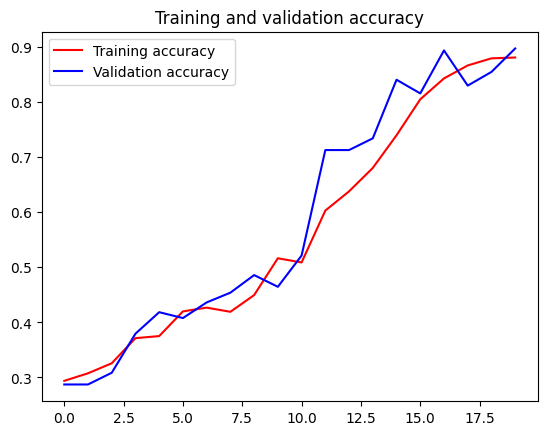

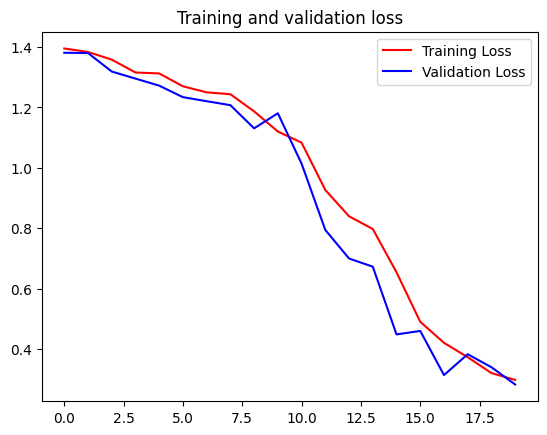

In [ ]:
import matplotlib.pyplot as plt
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


In [ ]:
model.save('/content/drive/MyDrive/model-cnn-fromscrstch.h5')

1/1 [==============================] - 1s 716ms/step


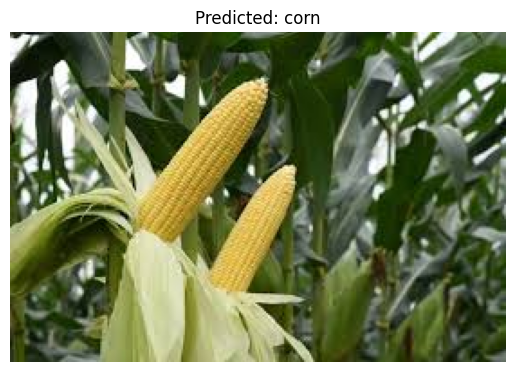

Predicted class: corn
1/1 [==============================] - 0s 19ms/step


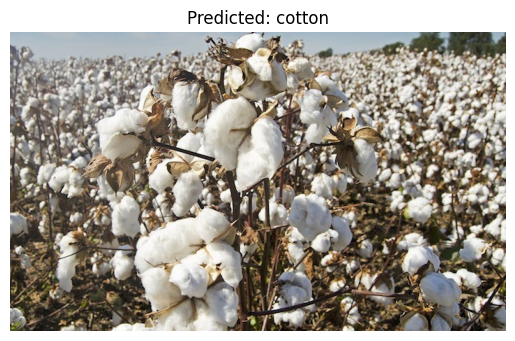

Predicted class: cotton
1/1 [==============================] - 0s 18ms/step


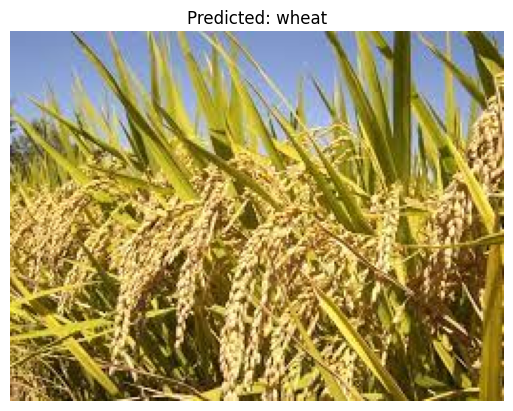

Predicted class: wheat
1/1 [==============================] - 0s 18ms/step


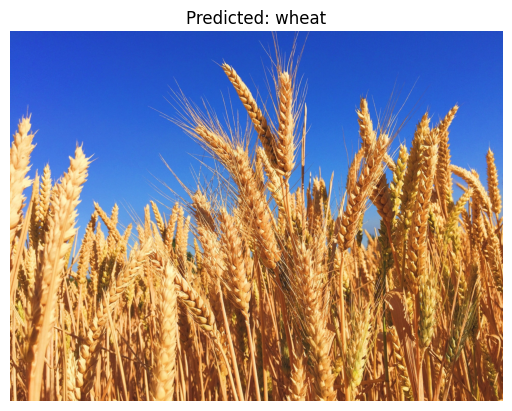

Predicted class: wheat


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 2. Fungsi untuk memuat dan memproses gambar
def load_and_process_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi (rescale)
    return img_array

# 3. Fungsi untuk membuat prediksi dan menampilkan hasil
def predict_image(img_path, model):
    processed_img = load_and_process_image(img_path)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]

    class_names = ['corn', 'cotton', 'rice', 'wheat']

    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

    print(f"Predicted class: {class_names[predicted_class]}")

# 4. Contoh penggunaan fungsi untuk memprediksi satu gambar
corn = '/content/drive/MyDrive/drive-download-20240628T032418Z-001/corn_1.jpg'
cotton = '/content/drive/MyDrive/drive-download-20240628T032418Z-001/cotton_1.jpg'
rice = '/content/drive/MyDrive/drive-download-20240628T032418Z-001/rice_1.jpg'
wheat = '/content/drive/MyDrive/drive-download-20240628T032418Z-001/wheat_1.jpg'

predict_image(corn, model)
predict_image(cotton, model)
predict_image(rice, model)
predict_image(wheat, model)


9/9 [==============================] - 2s 166ms/step


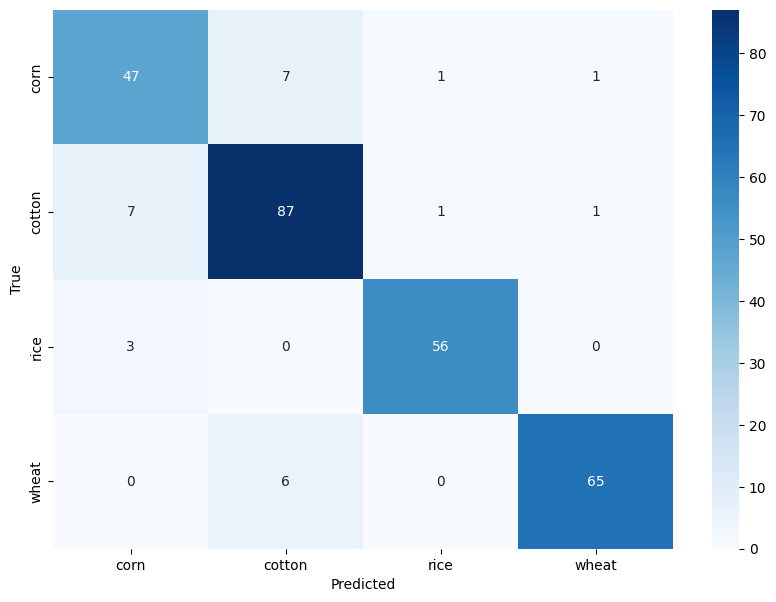

              precision    recall  f1-score   support

        corn       0.82      0.84      0.83        56
      cotton       0.87      0.91      0.89        96
        rice       0.97      0.95      0.96        59
       wheat       0.97      0.92      0.94        71

    accuracy                           0.90       282
   macro avg       0.91      0.90      0.90       282
weighted avg       0.91      0.90      0.90       282



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_dataset.reset()
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_dataset.classes

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['corn', 'cotton', 'rice', 'wheat']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


